In [175]:
# Random Forest Classification with RandomizedSearchCV

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [176]:
df=pd.read_csv('G:/Social_Network_Ads.csv')

In [177]:
df.shape

(400, 5)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [179]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [180]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [181]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [182]:
#y-purchase
#x is gender, age estimated salary

In [183]:
#handling categorical features
df['Gender']=df['Gender'].map({'Female':1, 'Male':0})

In [184]:
df['Gender'].value_counts()

1    204
0    196
Name: Gender, dtype: int64

In [185]:
#define X and y

In [268]:
y=df.iloc[:,-1]

In [269]:
X=df.iloc[:,1:4]

In [188]:
#we scale the data since salary and age and gender are in diffrent range

In [189]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =0)

In [190]:
X_test.shape, X_train.shape

((100, 3), (300, 3))

In [191]:
X_train.head()

,Gender,Age,EstimatedSalary
250,1,44,39000
63,0,32,120000
312,1,38,50000
159,1,32,135000
283,1,52,21000


In [192]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

In [193]:
X_train

,Gender,Age,EstimatedSalary
250,1,44,39000
63,0,32,120000
312,1,38,50000
159,1,32,135000
283,1,52,21000
...,...,...,...
323,1,48,30000
192,0,29,43000
117,0,36,52000
47,1,27,54000


In [194]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'gini', random_state = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=50)

In [215]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

In [216]:
from sklearn.metrics import accuracy_score
accuracy_test= accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train, y_pred_train)

In [217]:
accuracy_test

0.91

In [218]:
accuracy_train

0.9766666666666667

In [219]:
X_test

,Gender,Age,EstimatedSalary
132,0,30,87000
309,1,38,50000
341,0,35,75000
196,1,30,79000
246,1,35,50000
...,...,...,...
146,1,27,96000
135,0,23,63000
390,0,48,33000
264,0,48,90000


In [220]:
#cross validation score

In [233]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(classifier,X_test,y_test,cv=20,scoring='accuracy')

In [234]:
from sklearn.model_selection import cross_val_score

cross_val_train=cross_val_score(classifier,X_train,y_train,cv=20,scoring='accuracy')

In [235]:
cross_val.mean()

0.9099999999999999

In [236]:
cross_val_train.mean()

0.8366666666666667

In [227]:
import seaborn as sns

Text(0.5, 1.0, 'Confusion Matrix')

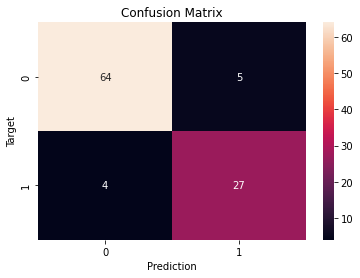

In [237]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_pred,y_test)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [240]:
# View the classification report for test data and predictions
#to get precision recall and f1 score of the data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



Check out the metrics for class 5 (Aspen). Precision is high, meaning that the model was careful to avoid labeling things “Aspen” that aren’t Aspens. On the other hand, recall is relatively low, which means that the classifier is missing a bunch of Aspens because it is being too careful! The F1 score reflects this imbalance.
On its own, a classification report tells us generally what kind of errors the model made, but it doesn’t give us specifics. The confusion matrix tells us exactly where mistakes were made, but it doesn’t give us summary metrics like precision, recall, or F1 score. Using both of these can give us a much more nuanced understanding of how our model performs, going far beyond what an accuracy score can tell us and avoiding some of its pitfalls.

In [241]:
#random grid search

In [242]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X, y)

claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=300,bootstrap= True,criterion='entropy',max_depth=3,max_features=2,min_samples_leaf= 3)

In [243]:
y_pred = classifier.predict(X_test)

In [244]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)

In [245]:
accuracy_score

0.91

# Visualising the Random Forest Regression results (higher resolution)

In [257]:
# Visualising the Random Forest Regression results (higher resolution)
from sklearn import tree

In [274]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=50)

In [277]:
#to check how many DT are created (specified DT=10 in code)
classifier.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=2124297904),
 DecisionTreeClassifier(max_features='auto', random_state=554800608),
 DecisionTreeClassifier(max_features='auto', random_state=979609483),
 DecisionTreeClassifier(max_features='auto', random_state=319445101),
 DecisionTreeClassifier(max_features='auto', random_state=1097252129),
 DecisionTreeClassifier(max_features='auto', random_state=472180702),
 DecisionTreeClassifier(max_features='auto', random_state=1702224004),
 DecisionTreeClassifier(max_features='auto', random_state=92067910),
 DecisionTreeClassifier(max_features='auto', random_state=1620556005),
 DecisionTreeClassifier(max_features='auto', random_state=653697094)]

In [278]:
len(classifier.estimators_)

10

[Text(695.264423076923, 1041.9, 'X[0] <= 0.5\ngini = 0.491\nsamples = 196\nvalue = [170, 130]'),
 Text(380.0480769230769, 951.3000000000001, 'X[2] <= 96000.0\ngini = 0.479\nsamples = 89\nvalue = [71, 47]'),
 Text(187.78846153846152, 860.7, 'X[2] <= 42500.0\ngini = 0.414\nsamples = 77\nvalue = [70, 29]'),
 Text(71.53846153846153, 770.1, 'X[1] <= 42.0\ngini = 0.498\nsamples = 25\nvalue = [18, 16]'),
 Text(35.76923076923077, 679.5, 'gini = 0.0\nsamples = 15\nvalue = [18, 0]'),
 Text(107.30769230769229, 679.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 16]'),
 Text(304.0384615384615, 770.1, 'X[1] <= 45.5\ngini = 0.32\nsamples = 52\nvalue = [52, 13]'),
 Text(178.84615384615384, 679.5, 'X[1] <= 36.5\ngini = 0.137\nsamples = 44\nvalue = [50, 4]'),
 Text(143.07692307692307, 588.9, 'gini = 0.0\nsamples = 25\nvalue = [31, 0]'),
 Text(214.61538461538458, 588.9, 'X[1] <= 37.5\ngini = 0.287\nsamples = 19\nvalue = [19, 4]'),
 Text(143.07692307692307, 498.29999999999995, 'X[2] <= 71000.0\ngini = 0.444\ns

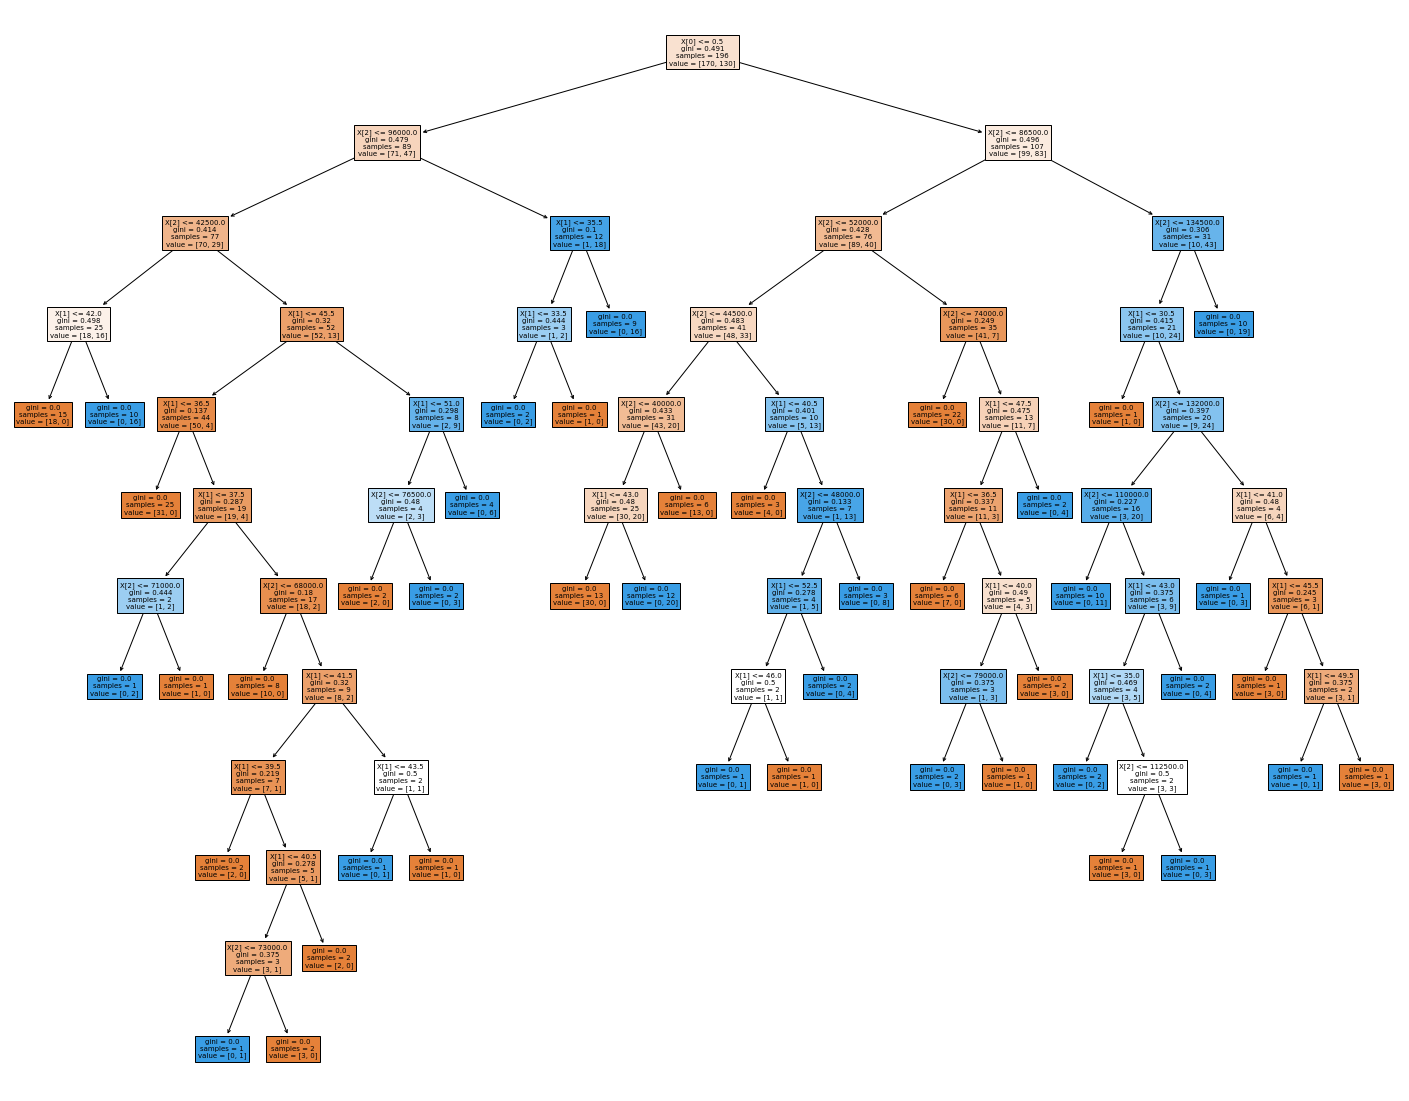

In [282]:
#we can draw the DT 
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier.estimators_[0], filled = True)

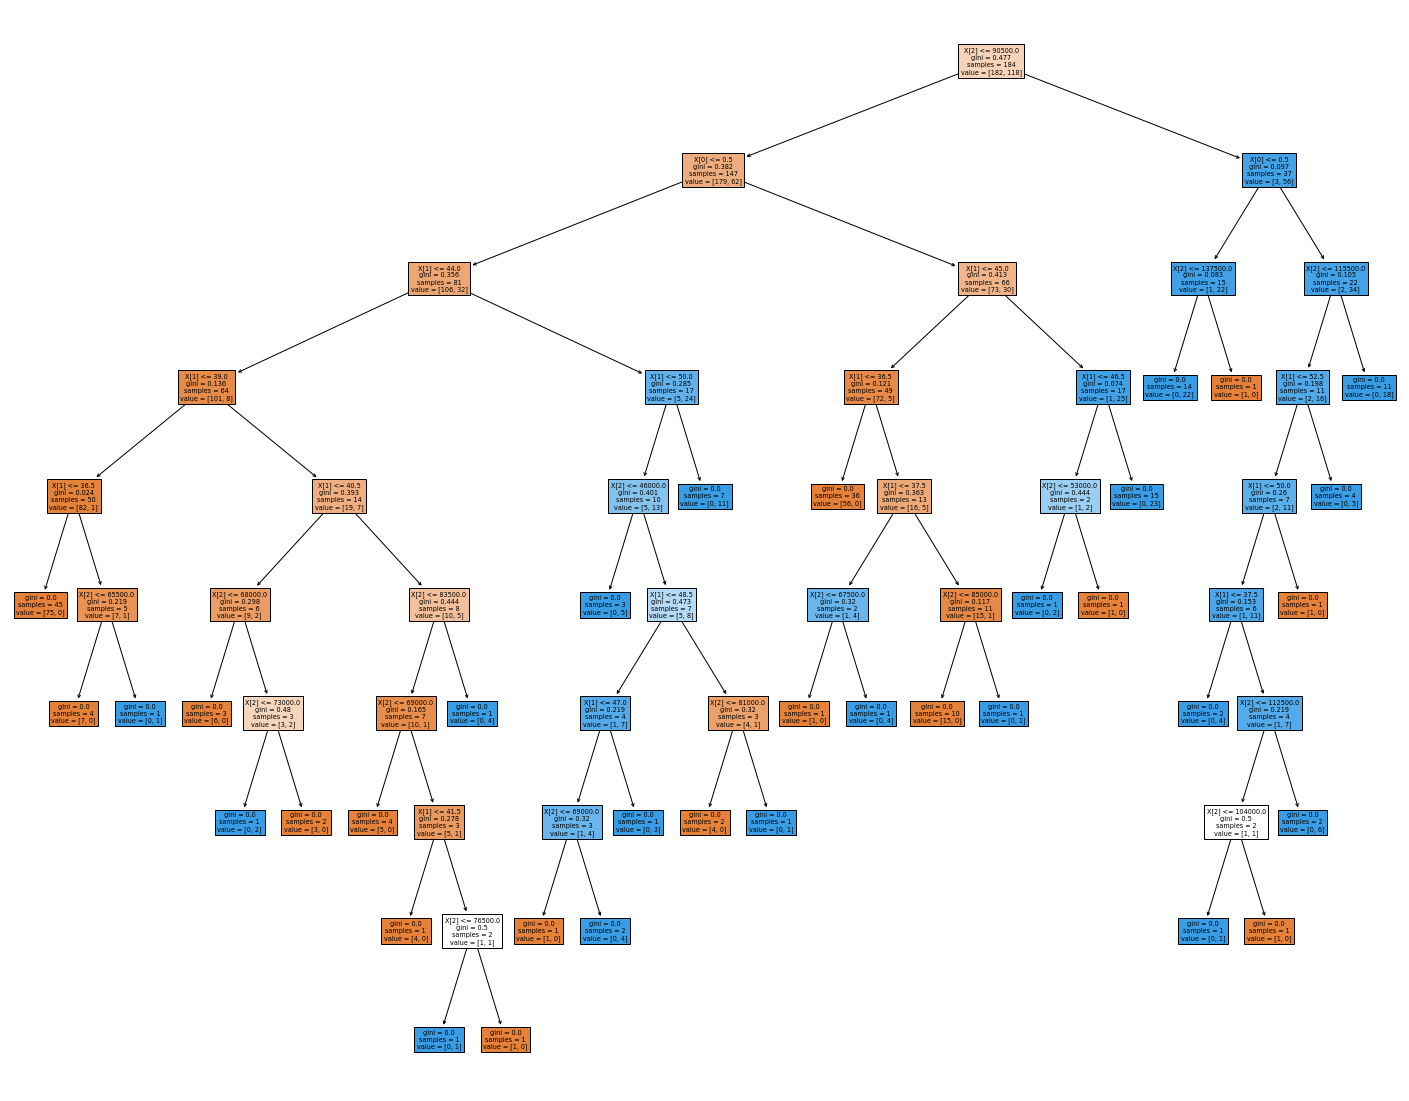

In [293]:
#to print all the DT 
fig = plt.figure(figsize=(25,20))
for i in range(len(classifier.estimators_)):
    tree.plot_tree(classifier.estimators_[i], filled = True)


In [289]:
#to see the data in text
fig = plt.figure(figsize=(25,20))
for i in range(len(classifier.estimators_)):
    print(tree.export_text(classifier.estimators_[i]))


|--- feature_0 <= 0.50
|   |--- feature_2 <= 96000.00
|   |   |--- feature_2 <= 42500.00
|   |   |   |--- feature_1 <= 42.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_1 >  42.00
|   |   |   |   |--- class: 1.0
|   |   |--- feature_2 >  42500.00
|   |   |   |--- feature_1 <= 45.50
|   |   |   |   |--- feature_1 <= 36.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  36.50
|   |   |   |   |   |--- feature_1 <= 37.50
|   |   |   |   |   |   |--- feature_2 <= 71000.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_2 >  71000.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_1 >  37.50
|   |   |   |   |   |   |--- feature_2 <= 68000.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_2 >  68000.00
|   |   |   |   |   |   |   |--- feature_1 <= 41.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 39.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   

<Figure size 1800x1440 with 0 Axes>